In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [35]:
# CRISP-DM 1: Liiketoiminnan ymmärrys
# Tavoitteena on ennustaa kiinteistöjen hintoja käyttämällä lineaarista ja logistista regressiota.
# Ennuste auttaa ymmärtämään mitkä tekijät vaikuttavat eniten asunnon hintaan.

# CRISP-DM 2: Datan ymmärrys
# Ladataan datasetti ja tarkastellaan sen ominaisuuksia.
df = pd.read_csv('real_estate_valuation.csv')
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [36]:

df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [37]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [38]:


print(df.isnull().sum())  # Tarkistetaan puuttuvat arvot

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


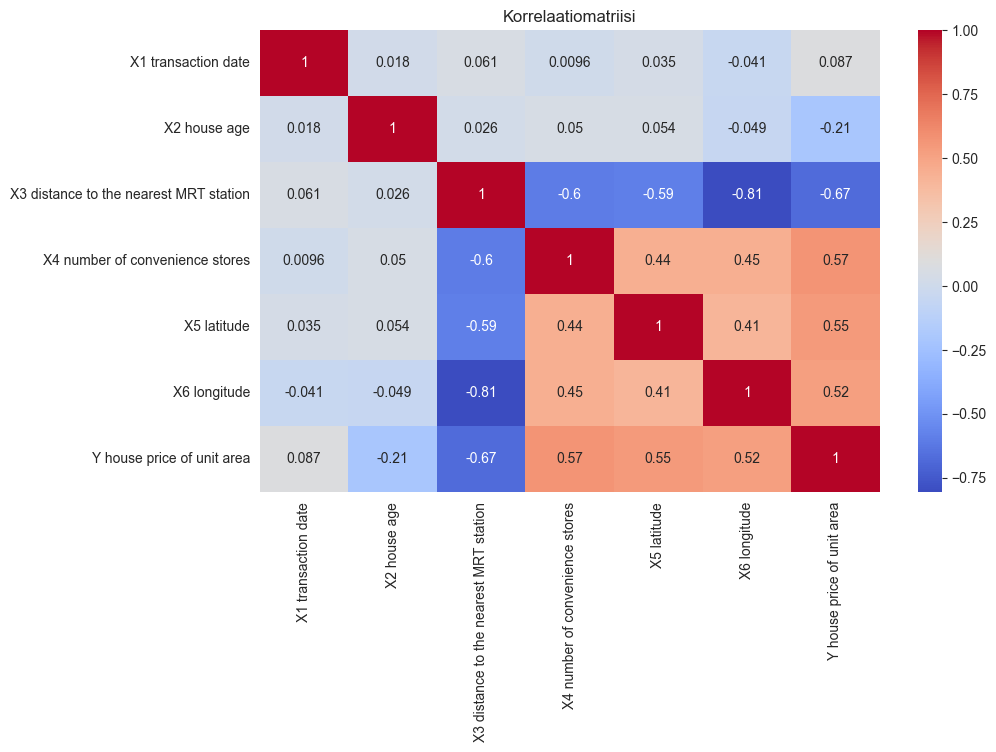

In [39]:

# Korrelaatiomatriisi
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korrelaatiomatriisi')
plt.show()

In [40]:

# CRISP-DM 3: Datan valmistelu
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 
            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
target = 'Y house price of unit area'

df.rename(columns={target: "Price"}, inplace=True)
X = df[features]
y = df['Price']

# Jaetaan data koulutus- ja testijoukkoihin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardointi (pakollinen logistiselle regressiolle, suositeltava lineaariselle)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# CRISP-DM 4: Mallinnus - Lineaarinen regressio
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# CRISP-DM 5: Arviointi - Lineaarinen regressio
mae = mean_absolute_error(y_test, y_pred_lin)
mse = mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print(f"Lineaarisen regression arviointi:\nMAE: {mae}\nMSE: {mse}\nR²: {r2}")

Lineaarisen regression arviointi:
MAE: 5.30535569007404
MSE: 53.505619124502054
R²: 0.6810580555095946


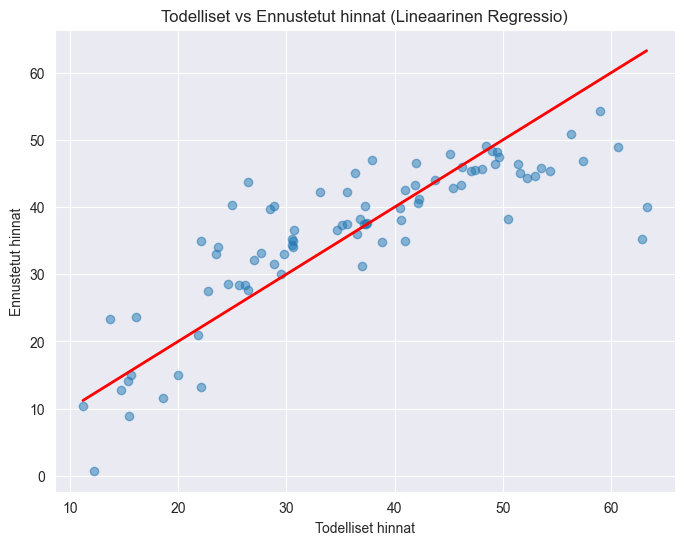

In [41]:

# Hajontakaavio Lineaariselle regressiolle
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Todelliset hinnat')
plt.ylabel('Ennustetut hinnat')
plt.title('Todelliset vs Ennustetut hinnat (Lineaarinen Regressio)')
plt.show()

In [42]:

# CRISP-DM 4: Mallinnus - Logistinen regressio
threshold = y_train.mean()
y_train_binary = (y_train >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_binary)
y_pred_log = log_reg.predict(X_test_scaled)

# CRISP-DM 5: Arviointi - Logistinen regressio
accuracy = accuracy_score(y_test_binary, y_pred_log)
conf_matrix = confusion_matrix(y_test_binary, y_pred_log)
class_report = classification_report(y_test_binary, y_pred_log)

print(f"Logistisen regression arviointi:\nTarkkuus: {accuracy}\nSekavuusmatriisi:\n{conf_matrix}\n\nLuokitteluraportti:\n{class_report}")

Logistisen regression arviointi:
Tarkkuus: 0.8192771084337349
Sekavuusmatriisi:
[[36 12]
 [ 3 32]]

Luokitteluraportti:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        48
           1       0.73      0.91      0.81        35

    accuracy                           0.82        83
   macro avg       0.83      0.83      0.82        83
weighted avg       0.84      0.82      0.82        83



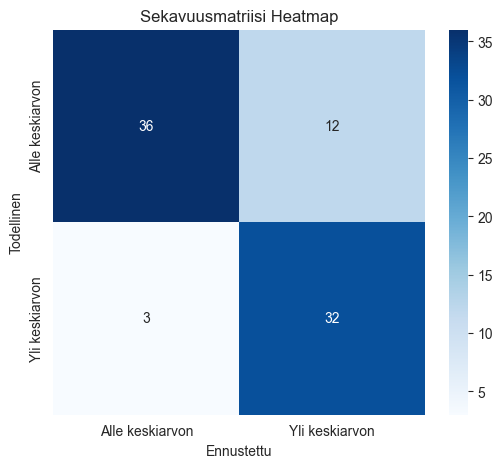

In [43]:

# Heatmap sekavuusmatriisille
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Alle keskiarvon', 'Yli keskiarvon'], yticklabels=['Alle keskiarvon', 'Yli keskiarvon'])
plt.xlabel('Ennustettu')
plt.ylabel('Todellinen')
plt.title('Sekavuusmatriisi Heatmap')
plt.show()

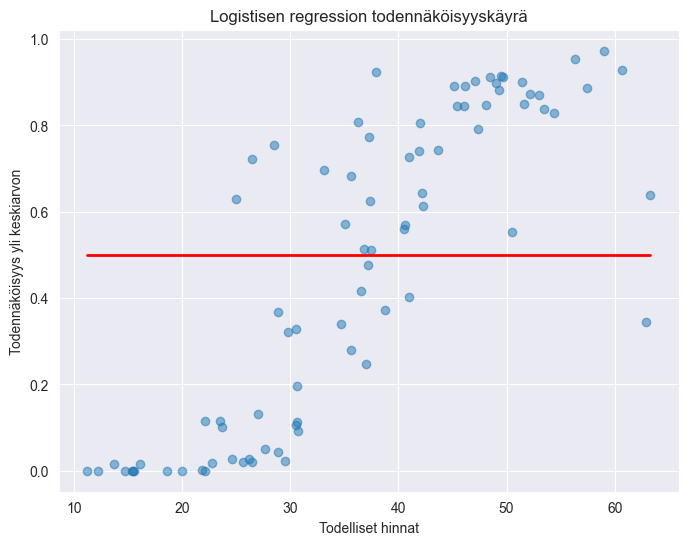

In [44]:

# Logistisen regression ennustekäyrä
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline

log_reg_cv = make_pipeline(StandardScaler(), LogisticRegressionCV(cv=5))
log_reg_cv.fit(X_train, y_train_binary)
probs = log_reg_cv.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(y_test, probs, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [0.5, 0.5], 'r', lw=2)  # Päätösraja
plt.xlabel('Todelliset hinnat')
plt.ylabel('Todennäköisyys yli keskiarvon')
plt.title('Logistisen regression todennäköisyyskäyrä')
plt.show()

In [45]:

# CRISP-DM 6: Päätelmät
feature_importance = pd.Series(abs(lin_reg.coef_), index=features).sort_values(ascending=False)
print("Tärkeimmät ominaisuudet (Lineaarinen Regressio):\n", feature_importance)


Tärkeimmät ominaisuudet (Lineaarinen Regressio):
 X3 distance to the nearest MRT station    5.786926
X4 number of convenience stores           3.218873
X2 house age                              3.062694
X5 latitude                               2.855108
X1 transaction date                       1.529631
X6 longitude                              0.441009
dtype: float64
